In [1]:
import pandas as pd 
import numpy as np 
import csv
from tqdm import tqdm
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
comments = pd.read_csv('/Users/mao_shiba/Desktop/Uchicago/COURSES/2021-Content-Analysis/Movie_Comments/moviedata-10m/moviedata-10m/comments.csv')
comments.columns

Index(['COMMENT_ID', 'USER_MD5', 'MOVIE_ID', 'CONTENT', 'VOTES',
       'COMMENT_TIME', 'RATING'],
      dtype='object')

In [71]:
comments = comments.loc[:, ['COMMENT_TIME','MOVIE_ID', 'RATING', 'CONTENT', 'USER_MD5']]
comments = comments.rename(columns={'COMMENT_TIME':'comment_time',
                                    'MOVIE_ID':'movie_id',
                                    'RATING':'rating',
                                    'CONTENT':'content',
                                   'USER_MD5':'user_md5'})
comments

,comment_time,movie_id,rating,content,user_md5
0,2018-09-05 19:42:07,5113101,2.0,480p，画质不高，黑白，y,0ab7e3efacd56983f16503572d2b9915
1,2019-07-09 14:52:07,5113101,1.0,毫无看点，黑白画质，一个男人孤独的心理情景历程，疯疯癫癫，没有任何恐怖的成分，这应该是剧情片吧.,84dfd3f91dd85ea105bc74a4f0d7a067
2,2010-11-05 22:15:44,3718526,3.0,上吊那裡超好笑，可惜最後報告近況的旁白大扣分,c9a47fd59b55967ceac07cac6d5f270c
3,2010-06-20 02:12:50,3718526,NaN,上海国际电影节观摩片,35d3d5a52a7515c2ca6bb4d8e965149b
4,2011-04-09 22:10:13,3718526,NaN,！,54bfe88b57d8a3caea2637e62d182cf7
...,...,...,...,...,...
4428470,2018-07-08 17:48:09,26914297,5.0,歌舞精良，但是故事情节看的真是闹心。在时代的大背景下，谁都无法独善其身。,517cd1ba10c6bf42465184808ec80c1f
4428471,2017-01-03 17:55:35,26914297,4.0,麦金托什的25周年全部是视觉路线,9b03a9f6953b06611e3352a889ecdfa2
4428472,2018-12-10 20:09:20,26914297,3.0,记不住里面任何一首歌，就觉得胖女孩的胳膊记忆犹新,4f696ad30cec6601ca49dfc2281985f3
4428473,2019-08-03 14:39:02,26914297,4.0,故事不喜欢，但是场景精致，唱段好听。,9b32c4b5f73092083e23669ea6731b86


In [84]:
# check empty content
empty_lst = []
error_lst = []
for index, row in tqdm(comments.iterrows()):
    try:
        if not row['content'].strip():
            empty_lst.append(index)
    except AttributeError:
        error_lst.append(index)

4428475it [02:42, 27255.96it/s]


In [85]:
empty_lst, error_lst

([190275,
  214925,
  396835,
  1537748,
  1922925,
  2146103,
  2583066,
  3101326,
  3770463],
 [2065335, 2875690])

In [86]:
comments.drop(empty_lst + error_lst, axis=0, inplace=True)
comments = comments.reset_index(drop=True)
comments

,comment_time,movie_id,rating,content,user_md5
0,2018-09-05 19:42:07,5113101,2.0,480p，画质不高，黑白，y,0ab7e3efacd56983f16503572d2b9915
1,2019-07-09 14:52:07,5113101,1.0,毫无看点，黑白画质，一个男人孤独的心理情景历程，疯疯癫癫，没有任何恐怖的成分，这应该是剧情片吧.,84dfd3f91dd85ea105bc74a4f0d7a067
2,2010-11-05 22:15:44,3718526,3.0,上吊那裡超好笑，可惜最後報告近況的旁白大扣分,c9a47fd59b55967ceac07cac6d5f270c
3,2010-06-20 02:12:50,3718526,NaN,上海国际电影节观摩片,35d3d5a52a7515c2ca6bb4d8e965149b
4,2011-04-09 22:10:13,3718526,NaN,！,54bfe88b57d8a3caea2637e62d182cf7
...,...,...,...,...,...
4428459,2018-07-08 17:48:09,26914297,5.0,歌舞精良，但是故事情节看的真是闹心。在时代的大背景下，谁都无法独善其身。,517cd1ba10c6bf42465184808ec80c1f
4428460,2017-01-03 17:55:35,26914297,4.0,麦金托什的25周年全部是视觉路线,9b03a9f6953b06611e3352a889ecdfa2
4428461,2018-12-10 20:09:20,26914297,3.0,记不住里面任何一首歌，就觉得胖女孩的胳膊记忆犹新,4f696ad30cec6601ca49dfc2281985f3
4428462,2019-08-03 14:39:02,26914297,4.0,故事不喜欢，但是场景精致，唱段好听。,9b32c4b5f73092083e23669ea6731b86


In [87]:
comments['comment_time'] = pd.to_datetime(comments['comment_time'])
comments = comments.set_index('comment_time').sort_index()
comments_count = comments['content'].groupby(comments.index.year).count().tolist()                     
comments_count

[1603,
 13596,
 34985,
 92789,
 142996,
 261817,
 355512,
 377018,
 312147,
 270202,
 268842,
 344790,
 453415,
 563922,
 934830]

In [88]:
comments_count_df = pd.DataFrame(comments['content'].groupby(comments.index.year).count(), columns=['content'])  

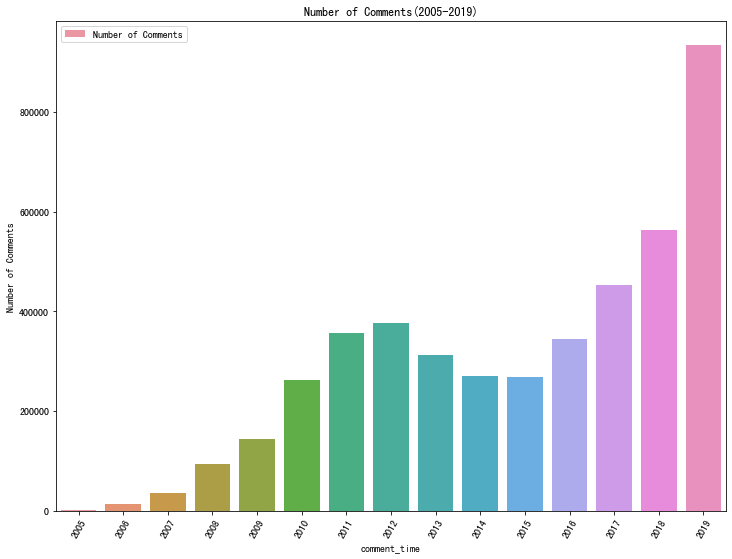

In [89]:
# plot number of comments by year
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.barplot(data = comments_count_df,
            x = comments_count_df.index,
            y = 'content',
            ax=ax,
            label='Number of Comments'
            ).set_title("Number of Comments(2005-2019)")
plt.xticks(rotation=60)
plt.ylabel('Number of Comments')
plt.legend(loc = 'upper left');

In [90]:
dd = {'a':9, 'b':10}
len(dd.values())

2

In [93]:
def get_rating_by_year(comments, comments_count):
    
    cur = 0
    year = 2005
    dic = {}
    for year_num in comments_count:
        rating_1 = 0
        rating_2 = 0
        rating_3 = 0
        rating_4 = 0
        rating_5 = 0
        rating_nan = 0
        
        # comments with ratings 
        score_lst = []
        users_dic = {}
        for x, md5 in tqdm(zip(comments.iloc[cur: cur + year_num]['rating'], 
                          comments.iloc[cur: cur + year_num]['user_md5'])):
            # users_info
            if md5 not in users_dic:
                users_dic[md5] = 0
            users_dic[md5] += 1
            
            if x in set((1.0,)):
                rating_1 += 1
                score_lst.append(x)
            elif x in set((2.0,)):
                rating_2 += 1
                score_lst.append(x)
            elif x in set((3.0,)):
                rating_3 += 1
                score_lst.append(x)
            elif x in set((4.0,)):
                rating_4 += 1
                score_lst.append(x)
            elif x in set((5.0,)):
                rating_5 += 1
                score_lst.append(x)
            else:
                rating_nan += 1
        
        # cal proportion
        portion_1 = rating_1/year_num
        portion_2 = rating_2/year_num
        portion_3 = rating_3/year_num
        portion_4 = rating_4/year_num
        portion_5 = rating_5/year_num
        portion_nan = rating_nan/year_num
        
        # cal mean and std of ratings
        rating_mean = np.array(score_lst).mean()
        rating_std = np.array(score_lst).std()
        
        # user stats
        user_num = len(users_dic.values())
        user_avg_comments = np.array(list(users_dic.values())).mean()
        user_std_comments = np.array(list(users_dic.values())).std()
        
        dic[year] = [rating_1, rating_2, rating_3, rating_4, rating_5, rating_nan,
                    portion_1, portion_2, portion_3, portion_4, portion_5, portion_nan,
                    rating_mean, rating_std, user_num, user_avg_comments, user_std_comments]
        cur += year_num
        year += 1
    return dic

In [94]:
dic = get_rating_by_year(comments, comments_count)
dic

1603it [00:00, 595049.94it/s]
13596it [00:00, 607646.03it/s]
34985it [00:00, 614471.87it/s]
92789it [00:00, 601717.21it/s]
142996it [00:00, 643448.56it/s]
261817it [00:00, 647819.81it/s]
355512it [00:00, 659000.95it/s]
377018it [00:00, 640820.90it/s]
312147it [00:00, 679497.47it/s]
270202it [00:00, 651323.46it/s]
268842it [00:00, 690873.10it/s]
344790it [00:00, 691878.18it/s]
453415it [00:00, 669269.13it/s]
563922it [00:00, 646066.81it/s]
934830it [00:01, 630063.67it/s]


{2005: [53,
  104,
  386,
  502,
  369,
  189,
  0.0330630068621335,
  0.06487835308796007,
  0.24079850280723644,
  0.31316281971303805,
  0.23019338739862757,
  0.11790393013100436,
  3.7284299858557284,
  1.0448625291333045,
  381,
  4.207349081364829,
  10.397180546371104],
 2006: [389,
  1084,
  3598,
  4296,
  2926,
  1303,
  0.028611356281259194,
  0.07972933215651662,
  0.26463665784054136,
  0.3159752868490733,
  0.215210355987055,
  0.09583701088555457,
  3.674042137802001,
  1.030522824416531,
  2553,
  5.325499412455934,
  16.294663649494467],
 2007: [1160,
  2915,
  9723,
  10809,
  6287,
  4091,
  0.03315706731456339,
  0.08332142346720023,
  0.27791910818922394,
  0.30896098327854793,
  0.17970558810918966,
  0.11693582964127483,
  3.5874279795429533,
  1.0311921207904957,
  6629,
  5.277568260672801,
  14.308811408858633],
 2008: [3328,
  8476,
  27719,
  28878,
  15961,
  8427,
  0.03586632036124972,
  0.09134703467005788,
  0.29873153067712765,
  0.3112222353942817,
 

In [96]:
s = 0
for v in dic.values():
    s += sum(v[:6])
s

4428464

In [97]:
sum(comments_count)

4428464

In [99]:
df = pd.DataFrame(dic, index = ['rating=1.0','rating=2.0', 'rating=3.0', 'rating=4.0', 'rating=5.0', 'rating=NaN',
                               'portion_1.0','portion_2.0', 'portion_3.0', 'portion_4.0', 'portion_5.0', 'portion_NaN',
                               'rating_mean', 'rating_std', 'user_num', 'user_avg_comments', 'user_std_comments'])
x = df.columns
df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
rating=1.0,53.000000,389.000000,1160.000000,3328.000000,6129.000000,12077.000000,20003.000000,23030.000000,24485.000000,24250.000000,25781.000000,32965.000000,40558.000000,50546.000000,53433.000000
rating=2.0,104.000000,1084.000000,2915.000000,8476.000000,14236.000000,26927.000000,39238.000000,43616.000000,39546.000000,35299.000000,37305.000000,46781.000000,61730.000000,75644.000000,96324.000000
rating=3.0,386.000000,3598.000000,9723.000000,27719.000000,44141.000000,82005.000000,114238.000000,123536.000000,101548.000000,87241.000000,88066.000000,111189.000000,145482.000000,180134.000000,283885.000000
rating=4.0,502.000000,4296.000000,10809.000000,28878.000000,44494.000000,82146.000000,108721.000000,110936.000000,84929.000000,70643.000000,67822.000000,89832.000000,121597.000000,151439.000000,298393.000000
rating=5.0,369.000000,2926.000000,6287.000000,15961.000000,22913.000000,40933.000000,50429.000000,49848.000000,40007.000000,34477.000000,32399.000000,44065.000000,59336.000000,74612.000000,166397.000000
rating=NaN,189.000000,1303.000000,4091.000000,8427.000000,11083.000000,17729.000000,22883.000000,26052.000000,21632.000000,18292.000000,17469.000000,19958.000000,24712.000000,31547.000000,36398.000000
portion_1.0,0.033063,0.028611,0.033157,0.035866,0.042861,0.046128,0.056265,0.061085,0.078441,0.089748,0.095896,0.095609,0.089450,0.089633,0.057158
portion_2.0,0.064878,0.079729,0.083321,0.091347,0.099555,0.102847,0.110370,0.115687,0.126690,0.130639,0.138762,0.135680,0.136145,0.134139,0.103039
portion_3.0,0.240799,0.264637,0.277919,0.298732,0.308687,0.313215,0.321334,0.327666,0.325321,0.322873,0.327575,0.322483,0.320858,0.319431,0.303676
portion_4.0,0.313163,0.315975,0.308961,0.311222,0.311156,0.313753,0.305815,0.294246,0.272080,0.261445,0.252275,0.260541,0.268180,0.268546,0.319195


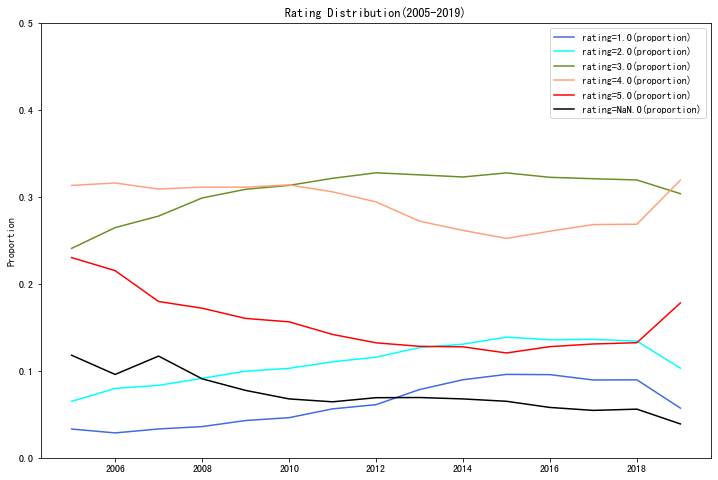

In [103]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, df.loc['portion_1.0', :],
        color='royalblue', label='rating=1.0(proportion)')
ax.plot(x, df.loc['portion_2.0', :],
        color='aqua', label='rating=2.0(proportion)')
ax.plot(x, df.loc['portion_3.0', :],
        color='olivedrab', label='rating=3.0(proportion)')
ax.plot(x, df.loc['portion_4.0', :],
        color='lightsalmon', label='rating=4.0(proportion)')
ax.plot(x, df.loc['portion_5.0', :],
        color='red', label='rating=5.0(proportion)')
ax.plot(x, df.loc['portion_NaN', :],
        color='k', label='rating=NaN.0(proportion)')
plt.title("Rating Distribution(2005-2019)")
plt.ylabel('Proportion')
plt.ylim([0, 0.5])
plt.legend(loc = 'upper right')

In [118]:
df.loc['portion_1.0', :]

2005    0.033063
2006    0.028611
2007    0.033157
2008    0.035866
2009    0.042861
2010    0.046128
2011    0.056265
2012    0.061085
2013    0.078441
2014    0.089748
2015    0.095896
2016    0.095609
2017    0.089450
2018    0.089633
2019    0.057158
Name: portion_1.0, dtype: float64

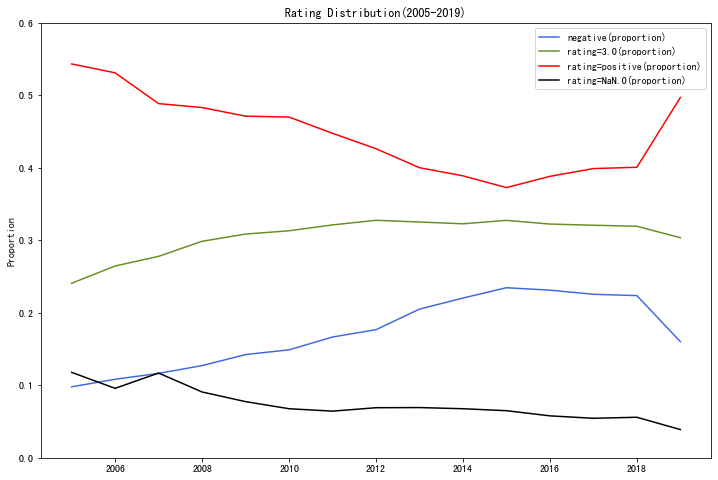

In [121]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, df.loc['portion_1.0', :] + df.loc['portion_2.0', :],
        color='royalblue', label='negative(proportion)')
ax.plot(x, df.loc['portion_3.0', :],
        color='olivedrab', label='rating=3.0(proportion)')
ax.plot(x, df.loc['portion_4.0', :] + df.loc['portion_5.0', :],
        color='red', label='rating=positive(proportion)')
ax.plot(x, df.loc['portion_NaN', :],
        color='k', label='rating=NaN.0(proportion)')
plt.title("Rating Distribution(2005-2019)")
plt.ylabel('Proportion')
plt.ylim([0, 0.6])
plt.legend(loc = 'upper right')

Text(0.5, 0, 'Year')

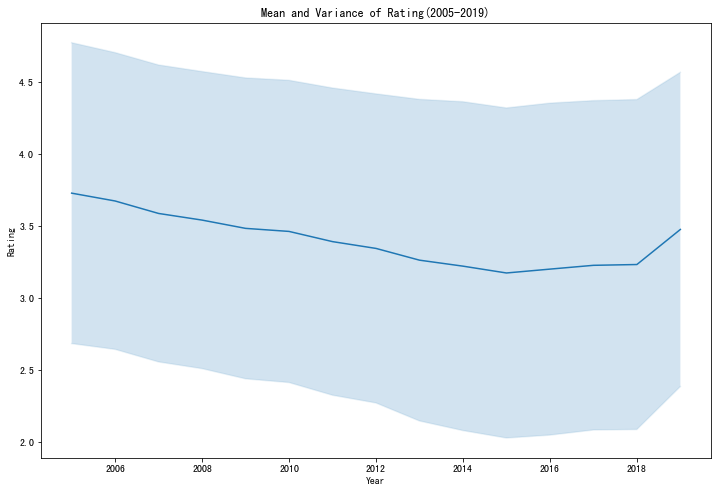

In [112]:
y_mean = df.loc['rating_mean', :]
y_std = df.loc['rating_std', :]
lower = y_mean - y_std
upper = y_mean + y_std

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y_mean, color='tab:blue')
ax.plot(x, lower, color='tab:blue', alpha=0.1)
ax.plot(x, upper, color='tab:blue', alpha=0.1)
ax.fill_between(x, lower, upper, alpha=0.2)

plt.title("Mean and Variance of Rating(2005-2019)")
plt.ylabel('Rating')
plt.xlabel('Year')

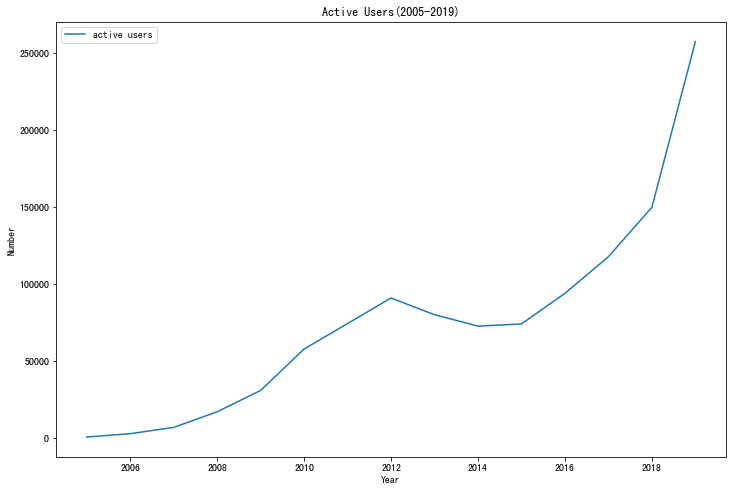

In [107]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, df.loc['user_num', :], label='active users')
plt.title("Active Users(2005-2019)")
plt.ylabel('Number')
plt.xlabel('Year')
plt.legend(loc = 'upper left')

Text(0.5, 0, 'Year')

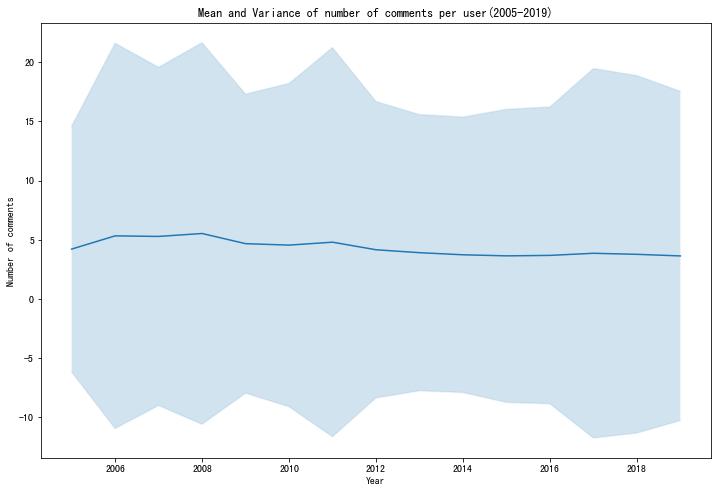

In [116]:
y_mean = df.loc['user_avg_comments', :]
y_std = df.loc['user_std_comments', :]
lower = y_mean - y_std
upper = y_mean + y_std

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y_mean, color='tab:blue')
ax.plot(x, lower, color='tab:blue', alpha=0.1)
ax.plot(x, upper, color='tab:blue', alpha=0.1)
ax.fill_between(x, lower, upper, alpha=0.2)

plt.title("Mean and Variance of number of comments per user(2005-2019)")
plt.ylabel('Number of comments')
plt.xlabel('Year')